# Multivariate Calculus for Machine Learning

In machine learning, calculus plays a crucial role in optimization and learning algorithms. Key concepts such as gradients, derivatives, and optimization are fundamental for training models, minimizing error functions, and updating parameters efficiently.

This notebook covers key concepts in multivariate calculus, including gradients, vector calculus, gradient descent, and applications in machine learning (e.g., neural networks and linear regression).

## Index:
1. **Basics of diferentiation**
2. **Vector Calculus and Gradients**
3. **Gradient Descent for optimization**
4. **Linear Regression using calculus**
5. **Applications in Neural Networks and Linear Regression**

## 1. Basics of diferentiation

A derivative tells us how a function changes at any given point. The slope of a straight line is rise over run (change in y over change in x), but for curves, we use derivatives to find the slope at a particular point.

The derivative of a function f(x) is written as:

$$
f'(x) = \displaystyle \lim_{x \to 0} \frac{f(x+h) - f(x)}{h}
$$

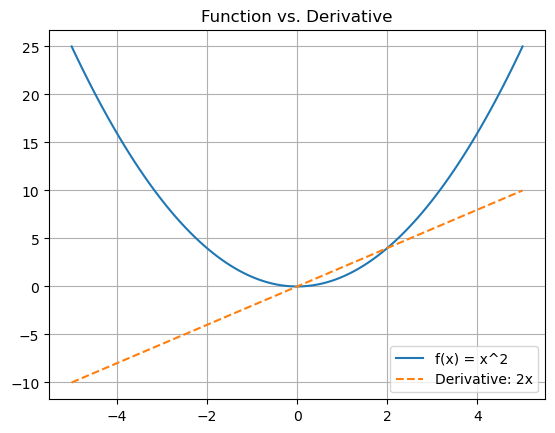

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x):
    return x**2

# Compute derivative
def df(x):
    return 2*x

# Generate values
x = np.linspace(-5, 5, 100)
y = f(x)

# Plot function and derivative
plt.plot(x, y, label="f(x) = x^2")
plt.plot(x, df(x), label="Derivative: 2x", linestyle="dashed")
plt.legend()
plt.title("Function vs. Derivative")
plt.grid()
plt.show()

## 2. Vector Calculus and Gradients

A gradient is a generalization of derivatives for multi-variable functions. It tells us the direction of steepest ascent.

For a function f(x,y), the gradient vector is:

$$
\nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})
$$

This gives the direction in which f(x,y) increases the fastest.

In [2]:
# Define a multivariable function
def f(x, y):
    return x**2 + y**2

# Compute gradient
def gradient(x, y):
    df_dx = 2*x
    df_dy = 2*y
    return np.array([df_dx, df_dy])

# Example usage
print("Gradient at (1,1):", gradient(1,1))


Gradient at (1,1): [2 2]


## 3. Gradient Descent for Optimization

Gradient Descent is a technique used to minimize a function by iteratively moving against the gradient direction. This is used in training machine learning models.

Formula for updating a parameter x:

$$
x_{new} = x - \alpha \nabla f(x)
$$

where α is the learning rate and ∇f(x) is the gradient. We subtract because the objective is to minimize the function. 

The following example calculates the gradient descent for the function f(x) = x^2:

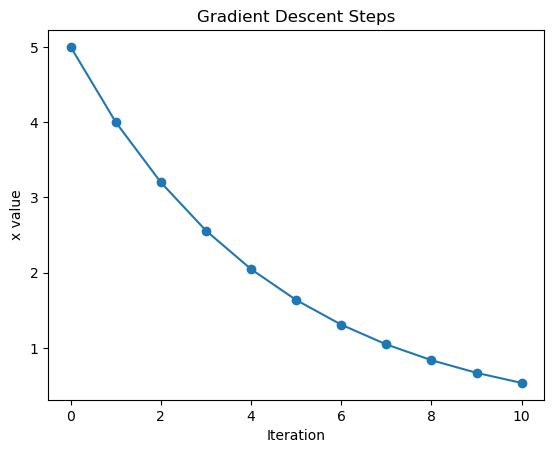

In [3]:
def gradient_descent(learning_rate=0.1, epochs=10, start_x=5):
    x = start_x  # Initial point
    history = [x]

    for _ in range(epochs):
        grad = 2*x  # Derivative of x^2
        x -= learning_rate * grad  # Update x
        history.append(x)
    
    return history

# Run gradient descent
steps = gradient_descent()

# Plot steps
plt.plot(steps, marker="o")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent Steps")
plt.show()

## 4. Linear Regression using calculus

In Linear Regression, we want to minimize the Mean Squared Error (MSE) loss function:

$$
J(\omega) = \frac{1}{m}\sum(y_i - (\omega X_i + b))^2
$$

The derivative of this function helps us update the model weights using gradient descent. Replacing *(wX_i + b)* (predicted output) with *y'*, we then have:

$$
J(\omega, b) = \frac{1}{m}\sum(y_i - (\hat{y}))^2
$$

Then we calculate partial derivatives deriving via *w* and *b*:

$$
\displaystyle \frac{\partial J}{\partial \omega} = -\frac{2}{m}\sum X (y-\hat{y})
$$

$$
\displaystyle \frac{\partial J}{\partial b} = -\frac{2}{m}\sum (y-\hat{y})
$$

And afterwards we update the parameters using gradient descent:

$$
\omega = \omega - \alpha \frac{\partial J}{\partial \omega}
$$

$$
b = b - \alpha \frac{\partial J}{\partial b}
$$

We can see an example using the following code snippet:

Epoch 0, Loss: 575.4484, w: 0.6609, b: 1.2794
Epoch 20, Loss: 297.5901, w: 7.8847, b: 0.5802
Epoch 40, Loss: 189.1546, w: 12.4047, b: 0.2229
Epoch 60, Loss: 146.7813, w: 15.2340, b: 0.0529
Epoch 80, Loss: 130.1981, w: 17.0059, b: -0.0176
Epoch 100, Loss: 123.6968, w: 18.1161, b: -0.0379
Epoch 120, Loss: 121.1430, w: 18.8121, b: -0.0345
Epoch 140, Loss: 120.1376, w: 19.2486, b: -0.0217
Epoch 160, Loss: 119.7408, w: 19.5226, b: -0.0065
Epoch 180, Loss: 119.5837, w: 19.6947, b: 0.0077

Final Parameters: w = 19.7985, b = 0.0193


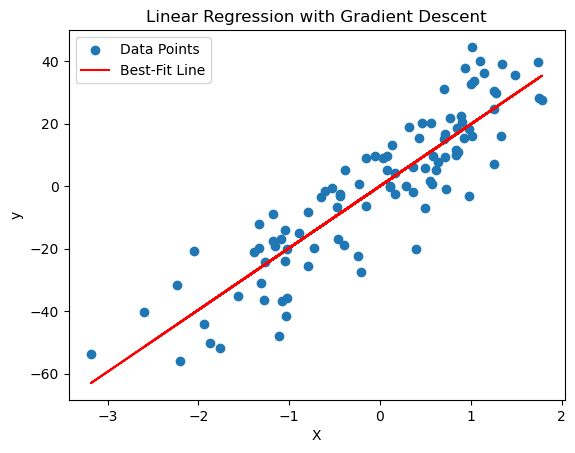

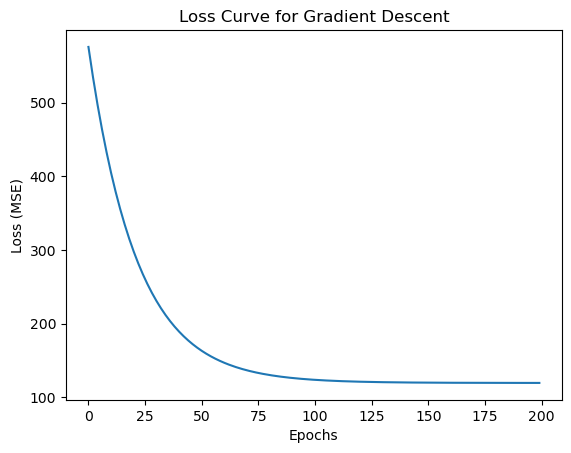

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X = X.flatten()  # Flatten for easier computation

# Initialize parameters
w = np.random.randn()  # Random weight
b = np.random.randn()  # Random bias

# Hyperparameters
learning_rate = 0.01
epochs = 200  # Number of iterations

# Store loss values for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    y_pred = w * X + b  # Predicted values
    error = y - y_pred  # Error

    # Compute gradients
    dw = -2 * np.sum(X * error) / len(X)  
    db = -2 * np.sum(error) / len(X)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute and store loss (MSE)
    loss = np.mean(error**2)
    loss_history.append(loss)

    # Print progress every 10 iterations
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")

# Final parameters
print(f"\nFinal Parameters: w = {w:.4f}, b = {b:.4f}")

# Plot data and regression line
plt.scatter(X, y, label="Data Points")
plt.plot(X, w * X + b, color='red', label="Best-Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

# Plot Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Gradient Descent")
plt.show()
